<h1>Hello!</h1>

references : 
https://www.technologynetworks.com/informatics/articles/mann-whitney-u-test-assumptions-and-example-363425
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions_print.html

Some key assumptions for Mann-Whitney U Test are detailed below:

The variable being compared between the two groups must be continuous (able to take any number in a range – for example age, weight, height or heart rate). This is because the test is based on ranking the observations in each group.
The data are assumed to take a non-Normal, or skewed, distribution. If your data are normally distributed, the unpaired Student’s t-test should be used to compare the two groups instead.
While the data in both groups are not assumed to be Normal, the data are assumed to be similar in shape across the two groups.
The data should be two randomly selected independent samples, meaning the groups have no relationship to each other. If samples are paired (for example, two measurements from the same group of participants), then a paired samples t-test should be used instead.
Sufficient sample size is needed for a valid test, usually more than 5 observations in each group.

In [1]:
#install

**We are looking at data on movies available on various streaming platforms. For every movie we have
its title, the year it was published, the age restriction, Rotten Tomatoes score as well as the availability
for the four platforms Netflix, Hulu, Prime Video and Disney +.**

<ul>**Disney+** has the reputation of being a platform for **children**, while other streaming platforms like Netflix
have a more** adult viewership**. > Is this really true? Especially since Disney+ also features many adult
movies (Marvel, Star Wars, ...). To find out, we want to** compare the age restrictions of the movies
available on Disney+ and Netflix**. Moreover, are the **movies on Netflix in general better than those on
Disney+? Use the Rotten Tomatoes score to answer this question.**</ul>

<li>Perform a detailed descriptive analysis of the data set. Use appropriate statistical measures to
describe it. Include at least one statistical graphic. The descriptive analysis should be aimed at
answering the above questions.</li>
<li> Perform appropriate statistical hypotheses tests to answer the two above questions: **Is the age
restriction for movies on Disney+ lower than for movies on Netflix? Is there a difference in Rotten
Tomatoes Score for movies on those two platforms? Give reasons for your choice of test.**</li>


Solution: Consider using statistical tests that are less sensitive to sample size differences, such as non-parametric tests (e.g., Mann-Whitney U test). Alternatively, perform resampling or bootstrapping to create equal-sized samples and compare those.


In [2]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
custom_colors = ["#ff6b6b","#95d5b2","#a2d2ff","#72efdd"]
import scikit_posthocs as sp



In [3]:
path= r"C:\Users\mail2\OneDrive\Documents\data science\Tu_dortmund\MoviesOnStreamingPlatforms.csv"
df = pd.read_csv(path, index_col=0)


In [4]:
df.shape


(9515, 10)

In [5]:
df.drop(['ID'],axis=1,inplace=True)

In [6]:
df.head(10)
df.reset_index(drop=True)


,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,The Irishman,2019,18+,98/100,1,0,0,0,0
1,Dangal,2016,7+,97/100,1,0,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9510,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


In [7]:
df.index


Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9505, 9506, 9507, 9508, 9509, 9510, 9511, 9512, 9513, 9514],
      dtype='int64', length=9515)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9515 entries, 0 to 9514
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            9515 non-null   object
 1   Year             9515 non-null   int64 
 2   Age              5338 non-null   object
 3   Rotten Tomatoes  9508 non-null   object
 4   Netflix          9515 non-null   int64 
 5   Hulu             9515 non-null   int64 
 6   Prime Video      9515 non-null   int64 
 7   Disney+          9515 non-null   int64 
 8   Type             9515 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 743.4+ KB


In [9]:
df['Age'].value_counts()

Age
18+    2276
7+     1090
13+     998
all     698
16+     276
Name: count, dtype: int64

> most likely the viewship is biased towards age of 18+ 

In [10]:
#converting rotten tomates rating to a scalar value and scaling them on 0 and 1 

df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('/100', '').astype('float') / 100

In [11]:
df.isna().sum()

Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

> take statistical method to fill the value of rotten tomatoes i think mean would suffice 

In [12]:
df.isna().sum()

Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [13]:
df['Rotten Tomatoes'].fillna(df['Rotten Tomatoes'].mean(), inplace=True)

C:\Users\mail2\AppData\Local\Temp\ipykernel_5908\3935841645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rotten Tomatoes'].fillna(df['Rotten Tomatoes'].mean(), inplace=True)


In [14]:
print(df[df['Age'].isna() & df['Prime Video'] == 1],
df[df['Age'].isna() & df['Netflix'] == 1])




                                                  Title  Year  Age  \
468                                               Stree  2018  NaN   
605                                         City of Joy  2016  NaN   
625                                              Circle  2015  NaN   
666                                        The Outsider  2018  NaN   
893                                           Rock On!!  2008  NaN   
...                                                 ...   ...  ...   
8607         The Amazing Adventure of Marchello the Cat  2017  NaN   
8609         Little Pim: Let's Count - Spanish for Kids  2010  NaN   
8610                  Arthur and the Haunted Tree House  2017  NaN   
8611  Rollin: The Fall of the Auto Industry and the ...  2016  NaN   
8613                                5K1-States Evidence  2018  NaN   

      Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  
468              0.71        1     0            1        0     0  
605              0.68    

>       Age value is predominantly missing in these category "Netflix" and "Prime Video" with combining values of 1948 + 1797 out of 4177

In [15]:
df[df['Age'].isna() & df['Netflix']].head(50)

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
35,On Body and Soul,2017,NaN,0.88,1,0,0,0,0
40,Special 26,2013,NaN,0.87,1,0,0,0,0
57,The Distinguished Citizen,2016,NaN,0.86,1,0,0,0,0
65,Chasing Coral,2017,NaN,0.85,1,0,0,0,0
88,"What Happened, Miss Simone?",2015,NaN,0.84,1,0,0,0,0
92,Cargo,2017,NaN,0.84,1,0,0,0,0
94,Cuba and the Cameraman,2017,NaN,0.83,1,0,0,0,0
114,Springsteen On Broadway,2018,NaN,0.82,1,0,0,0,0
122,The Endless Trench,2019,NaN,0.82,1,0,0,0,0
123,Even the Rain,2010,NaN,0.82,1,0,0,0,0


1797
197


<Axes: title={'center': 'Age Distribution for DIsney+ Video'}, xlabel='Age'>

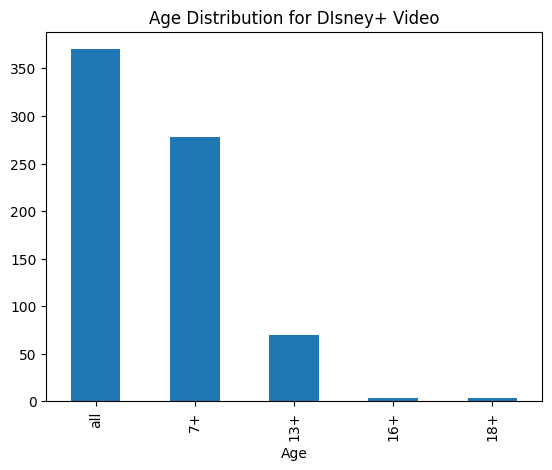

In [16]:
print(df[df['Netflix'] == 1]['Age'].isna().sum()) 
print(df[df['Disney+'] == 1]['Age'].isna().sum()) 

df[df['Disney+'] == 1]['Age'].value_counts().plot(kind='bar', title="Age Distribution for DIsney+ Video")


<Axes: title={'center': 'Age Distribution for Netflix'}, xlabel='Age'>

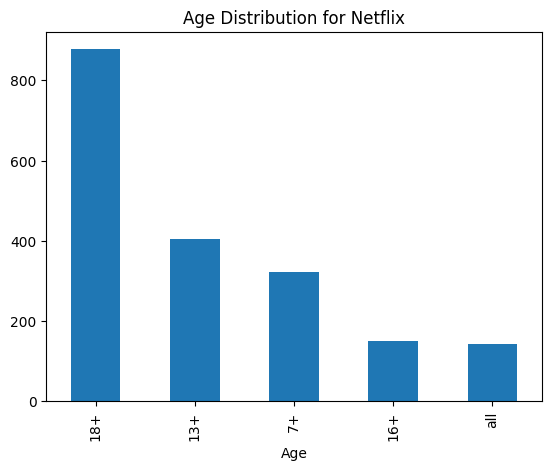

In [17]:
df[df['Netflix'] == 1]['Age'].value_counts().plot(kind='bar', title="Age Distribution for Netflix")


In [18]:
df['Age'].value_counts()

Age
18+    2276
7+     1090
13+     998
all     698
16+     276
Name: count, dtype: int64

In [19]:
colors = custom_colors
explode = (0, 0, 0, 0) 
def donut(i,df,sizes,title):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.axis('equal')

In [20]:
def val_sum(df,c):
    return df[c].sum(axis=0)

In [21]:

val_counts = []
dfs = [df]
cols = ['Netflix','Hulu','Prime Video','Disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))

In [22]:
val_counts

[3695, 1047, 4113, 922]

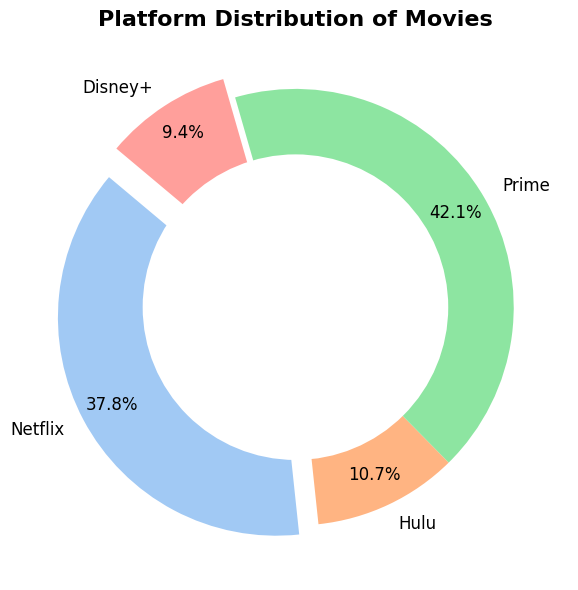

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample values and customizations
labels = ['Netflix', 'Hulu', 'Prime', 'Disney+']
sizes1 = [val_counts[0], val_counts[1], val_counts[2], val_counts[3]]
colors = sns.color_palette("pastel")  
explode = (0.1, 0, 0, 0.1)  # Slightly "explode" Netflix and Disney+

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes1,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%', 
    startangle=140,  
    colors=colors,
    pctdistance=0.85,  
    textprops={'fontsize': 12}
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title("Platform Distribution of Movies", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


{'Netflix': 1797, 'Hulu': 329, 'Prime': 1948, 'Disney+': 197}


C:\Users\mail2\AppData\Local\Temp\ipykernel_5908\1552634409.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


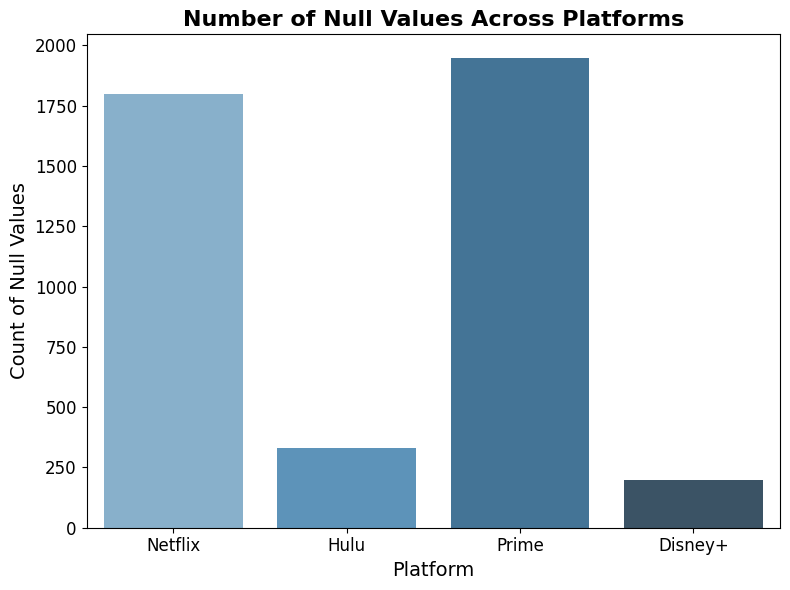

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count null values in the 'Age' column for each platform
null_counts = {
    'Netflix': df[df['Netflix'] == 1]['Age'].isna().sum(),
    'Hulu': df[df['Hulu'] == 1]['Age'].isna().sum(),
    'Prime': df[df['Prime Video'] == 1]['Age'].isna().sum(),
    'Disney+': df[df['Disney+'] == 1]['Age'].isna().sum()
}

# Convert to a DataFrame for easier plotting
null_df = pd.DataFrame(list(null_counts.items()), columns=['Platform', 'Null Count'])
print(null_counts)
# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(
    data=null_df,
    x='Platform',
    y='Null Count',
    palette='Blues_d'  # Use a gradient blue palette
)

# Add title and labels
plt.title('Number of Null Values Across Platforms', fontsize=16, weight='bold')
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count of Null Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


> proportion of the prime and netflix is predominant we will further amputate the Nan values

In [25]:
df_netflix = df[df['Age'].isna() & df['Netflix']]


In [26]:
df_netflix.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
35,On Body and Soul,2017,NaN,0.88,1,0,0,0,0
40,Special 26,2013,NaN,0.87,1,0,0,0,0
57,The Distinguished Citizen,2016,NaN,0.86,1,0,0,0,0
65,Chasing Coral,2017,NaN,0.85,1,0,0,0,0
88,"What Happened, Miss Simone?",2015,NaN,0.84,1,0,0,0,0


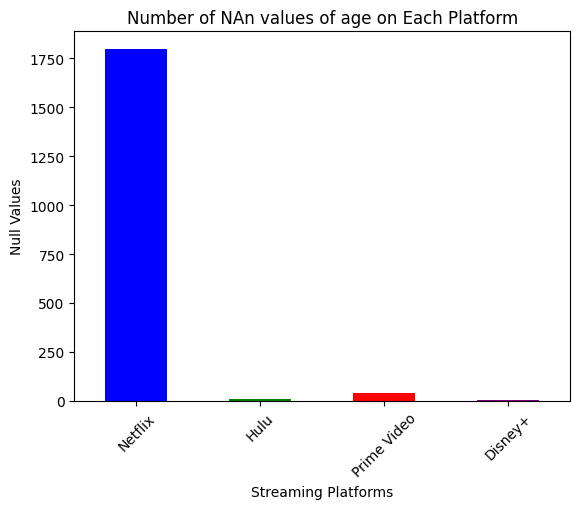

In [27]:
platform_counts = df_netflix[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
platform_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Number of NAn values of age on Each Platform')
plt.xlabel('Streaming Platforms')
plt.ylabel('Null Values')
plt.xticks(rotation=45)
plt.show()

> this plot represents the number of null values which are most in netflix by further exploring these category we can amputate them 

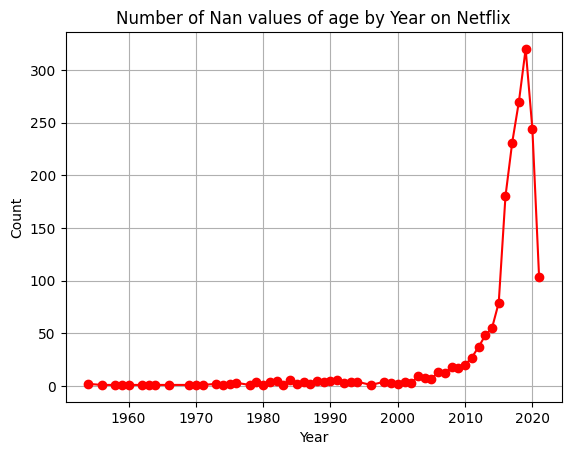

In [28]:
x = df_netflix['Year'].value_counts().sort_index()

plt.plot(x.index, x.values, marker='o', linestyle='-', color='r')
plt.title('Number of Nan values of age by Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

> if we don't want the data to be skewed optimal approach would be to drop them off or marking as 0 default since no additional information is available lets firstly check the trend of with the values of netflix having the age object 


In [29]:
platform_counts = df[df['Netflix'] == 1]
pp = platform_counts['Year'].value_counts().sort_index()  
print(pp)

Year
1954      2
1956      1
1958      1
1959      1
1960      1
       ... 
2017    449
2018    540
2019    573
2020    478
2021    201
Name: count, Length: 62, dtype: int64


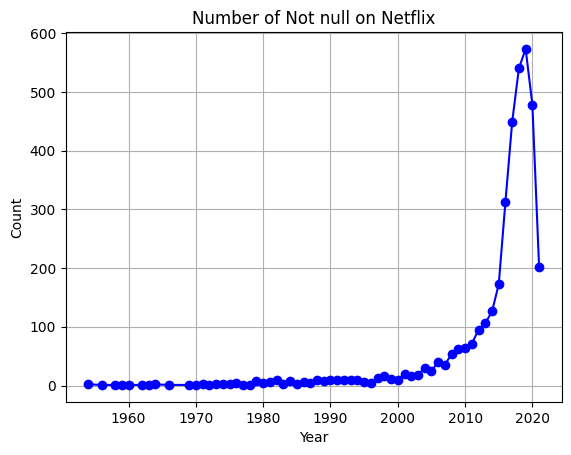

In [30]:
plt.plot(pp.index, pp.values, marker='o', linestyle='-', color='b')
plt.title('Number of Not null on Netflix')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [31]:
df_groupy = df[(df['Netflix'] == 1) & ((df['Hulu'] == 1) | (df['Prime Video'] == 1) | (df['Disney+'] == 1))].groupby('Year')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
df_groupy


,Netflix,Hulu,Prime Video,Disney+
Year,,,,
1954,1,0,1,0
1980,1,0,1,0
1986,1,0,1,0
1988,1,1,0,0
1989,1,1,0,0
1992,2,0,2,0
1994,1,0,1,0
1995,1,0,1,0
1996,1,1,0,0


In [32]:
x = df[df['Year'] == 2019]
x.groupby('Age')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()

,Netflix,Hulu,Prime Video,Disney+
Age,,,,
13+,40,16,20,6
16+,23,3,4,0
18+,140,49,64,1
7+,37,12,15,18
all,13,4,2,5


> conver the age to normal int format !

> thus we cannot conclude a decisive decison to amputate the values so its wise to remove the values 

In [33]:
df_t = df[df['Age'].notna()]
df_t

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,The Irishman,2019,18+,0.98,1,0,0,0,0
1,Dangal,2016,7+,0.97,1,0,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,0.95,1,0,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,0.94,1,0,0,0,0
4,Roma,2018,18+,0.94,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9503,Disney My Music Story: Sukima Switch,2021,16+,0.16,0,0,0,1,0
9505,Great Shark Chow Down,2019,7+,0.14,0,0,0,1,0
9507,Texas Storm Squad,2020,13+,0.14,0,0,0,1,0
9508,What the Shark?,2020,13+,0.14,0,0,0,1,0


In [34]:
df_t['Age']=df_t['Age'].str.replace('+','')
df_t['Age']=df_t['Age'].str.replace('all','0')
df_t['Age']=df_t['Age'].astype(str).astype(int)

C:\Users\mail2\AppData\Local\Temp\ipykernel_5908\1578315042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['Age']=df_t['Age'].str.replace('+','')
C:\Users\mail2\AppData\Local\Temp\ipykernel_5908\1578315042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['Age']=df_t['Age'].str.replace('all','0')
C:\Users\mail2\AppData\Local\Temp\ipykernel_5908\1578315042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [35]:
disney_data = df_t[df_t['Disney+'] == 1]
netflix_data = df_t[df_t['Netflix'] == 1]
#  for testing 
prime_data = df_t[df_t['Prime Video'] == 1]
hulu_data = df_t[df_t['Hulu'] == 1]


In [36]:
disney_data 

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
270,White Fang,2018,7,0.76,1,0,0,1,0
712,Muppets Most Wanted,2014,7,0.67,1,0,0,1,0
1330,Zapped,2014,0,0.59,1,1,1,1,0
3958,Diary of a Wimpy Kid,2010,7,0.67,0,1,0,1,0
4131,The Kid,2019,18,0.62,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
9503,Disney My Music Story: Sukima Switch,2021,16,0.16,0,0,0,1,0
9505,Great Shark Chow Down,2019,7,0.14,0,0,0,1,0
9507,Texas Storm Squad,2020,13,0.14,0,0,0,1,0
9508,What the Shark?,2020,13,0.14,0,0,0,1,0


In [37]:
netflix_data

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,The Irishman,2019,18,0.98,1,0,0,0,0
1,Dangal,2016,7,0.97,1,0,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7,0.95,1,0,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7,0.94,1,0,0,0,0
4,Roma,2018,18,0.94,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3628,S Storm,2016,13,0.29,1,0,0,0,0
3631,Trese After Dark,2021,13,0.24,1,0,0,0,0
3634,The Upshaws - The Afterparty,2021,18,0.20,1,0,0,0,0
3643,Har Kisse Ke Hisse Kaamyaab,2020,7,0.15,1,0,0,0,0


In [38]:
stats_disney = disney_data['Age'].describe()
stats_netflix = netflix_data['Age'].describe()
disney_rt_stats = disney_data['Rotten Tomatoes'].describe()
netflix_rt_stats = netflix_data['Rotten Tomatoes'].describe()




In [39]:
print(stats_disney) 
print()
print(stats_netflix)
print("Disney+ Rotten Tomatoes Stats:" , "\n", disney_rt_stats)
print("Netflix Rotten Tomatoes Stats:","\n",netflix_rt_stats)

count    725.000000
mean       4.102069
std        4.589269
min        0.000000
25%        0.000000
50%        0.000000
75%        7.000000
max       18.000000
Name: Age, dtype: float64

count    1898.000000
mean       13.544784
std         5.560265
min         0.000000
25%        13.000000
50%        16.000000
75%        18.000000
max        18.000000
Name: Age, dtype: float64
Disney+ Rotten Tomatoes Stats: 
 count    725.000000
mean       0.617697
std        0.129822
min        0.100000
25%        0.530000
50%        0.610000
75%        0.710000
max        0.960000
Name: Rotten Tomatoes, dtype: float64
Netflix Rotten Tomatoes Stats: 
 count    1898.000000
mean        0.604995
std         0.128081
min         0.120000
25%         0.510000
50%         0.600000
75%         0.690000
max         0.980000
Name: Rotten Tomatoes, dtype: float64


Missing 'Age' values for Netflix: 1797
Missing 'Age' values for Disney+: 197


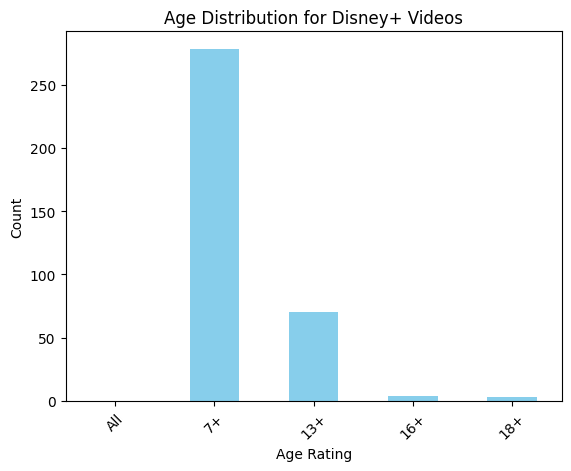

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Count missing values for the 'Age' column for Netflix and Disney+
missing_netflix = df[df['Netflix'] == 1]['Age'].isna().sum()
missing_disney = df[df['Disney+'] == 1]['Age'].isna().sum()

print(f"Missing 'Age' values for Netflix: {missing_netflix}")
print(f"Missing 'Age' values for Disney+: {missing_disney}")

# Define custom sorting order for age ratings
age_order = ["All", "7+", "13+", "16+", "18+"]

# Filter and sort Disney+ 'Age' data
disney_age_counts = df[df['Disney+'] == 1]['Age'].value_counts()
disney_age_counts = disney_age_counts.reindex(age_order).fillna(0)  # Reorder and fill missing categories with 0

# Plot the sorted bar graph
disney_age_counts.plot(kind='bar', title="Age Distribution for Disney+ Videos", color='skyblue')
plt.xlabel("Age Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [41]:
disney_data['Age'].value_counts()

Age
0     370
7     278
13     70
16      4
18      3
Name: count, dtype: int64

In [42]:
netflix_data['Age'].value_counts()

Age
18    877
13    404
7     322
16    151
0     144
Name: count, dtype: int64

C:\Users\mail2\AppData\Local\Temp\ipykernel_5908\654454428.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box1 = sns.boxplot(data=netflix_data, y='Age', palette="Blues", width=0.5)
C:\Users\mail2\AppData\Local\Temp\ipykernel_5908\654454428.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box2 = sns.boxplot(data=disney_data, y='Age', palette="Oranges", width=0.5)


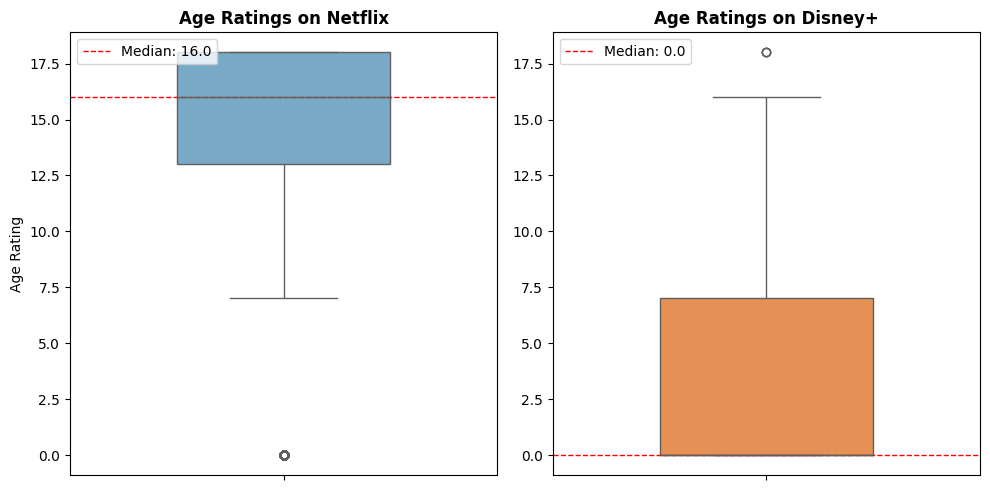

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate medians
netflix_median = netflix_data['Age'].median()
disney_median = disney_data['Age'].median()

# Enhanced boxplot visualization with median emphasis
plt.figure(figsize=(10, 5))

# Netflix Boxplot
plt.subplot(1, 2, 1)
box1 = sns.boxplot(data=netflix_data, y='Age', palette="Blues", width=0.5)
plt.title('Age Ratings on Netflix', fontsize=12, weight='bold')
plt.ylabel('Age Rating')
plt.axhline(y=netflix_median, color='red', linestyle='--', linewidth=1, label=f'Median: {netflix_median}')
plt.legend(loc='upper left')

# Disney+ Boxplot
plt.subplot(1, 2, 2)
box2 = sns.boxplot(data=disney_data, y='Age', palette="Oranges", width=0.5)
plt.title('Age Ratings on Disney+', fontsize=12, weight='bold')
plt.ylabel('')
plt.axhline(y=disney_median, color='red', linestyle='--', linewidth=1, label=f'Median: {disney_median}')
plt.legend(loc='upper left')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


the data for both of the category in the whisker plot states that the median lies way towards zero for disney+ and for netflix its around 16 the outliers are inverse in both clearly proving the concentration of the movies category on both platforms further we will plot KDE graph to see the estimations where the data lies the most 

In [44]:
#assuming a certain threshold to get the kids age range we could have seen the distinction but as the class imbalance is on peek this result is invalid
netflix_children_movies  = netflix_data[netflix_data['Age'] <=16].value_counts().sum()
disney_children_movies = disney_data[disney_data['Age']<=16].value_counts().sum()
print(netflix_children_movies , " - ?  ? - ",disney_children_movies)

1021  - ?  ? -  722


In [45]:
netflix_data.shape

(1898, 9)

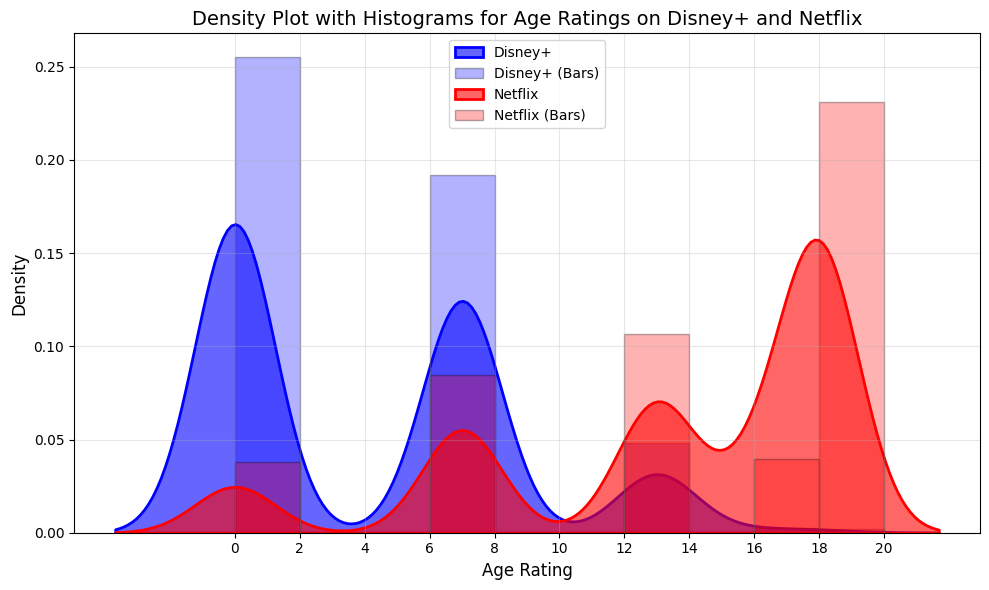

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enhanced Density Plot with Histograms
plt.figure(figsize=(10, 6))

# KDE plot for Disney+
sns.kdeplot(disney_data['Age'], label="Disney+", fill=True, color='blue', alpha=0.6, linewidth=2)
# Histogram for Disney+
plt.hist(disney_data['Age'], bins=range(0, 21, 2), density=True, color='blue', alpha=0.3, label="Disney+ (Bars)", edgecolor='black')

# KDE plot for Netflix
sns.kdeplot(netflix_data['Age'], label="Netflix", fill=True, color='red', alpha=0.6, linewidth=2)
# Histogram for Netflix
plt.hist(netflix_data['Age'], bins=range(0, 21, 2), density=True, color='red', alpha=0.3, label="Netflix (Bars)", edgecolor='black')

# Adding titles and labels
plt.title("Density Plot with Histograms for Age Ratings on Disney+ and Netflix", fontsize=14)
plt.xlabel("Age Rating", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(range(0, 21, 2))  # Adjust X-axis ticks for better readability
plt.tight_layout()

plt.show()



aaas the KDE plot depicts the information of the concentraion of the fields which are near the 0th area are oriented for the kids and here disney is more dense for the other part of the graph at 20 concentration of the netflix can be seen at in between it shows a normal distribution for both and by this we can further conclude the verdict 


In [47]:
disney_age_ratings = disney_data['Age']
netflix_age_ratings =  netflix_data['Age']

In [48]:
print(disney_age_ratings.describe())
print(netflix_age_ratings.describe())

count    725.000000
mean       4.102069
std        4.589269
min        0.000000
25%        0.000000
50%        0.000000
75%        7.000000
max       18.000000
Name: Age, dtype: float64
count    1898.000000
mean       13.544784
std         5.560265
min         0.000000
25%        13.000000
50%        16.000000
75%        18.000000
max        18.000000
Name: Age, dtype: float64


- quartile differnce can be seen upto 75% data is spread for 7 or below range of ages for disney plus , wheras for the netflix the data at 25% is above 13 and at the third quartile correponds to the 18 age which is adult 
- mean is also a proof of this verdict being at 4.10 for disney and 13.54 for netflix 
- the median is also a proof of this verdict being at 00 for disney and 16


In [49]:
#checking skewness to see where data lie we know we have seen that in kde plot but for the means of mathematical derivation we are runnign a kurtosis test 

disney_skewness = disney_age_ratings.skew()
disney_kurtosis = disney_age_ratings.kurtosis()

netflix_skewness = netflix_age_ratings.skew()
netflix_kurtosis = netflix_age_ratings.kurtosis()

print(f"Disney+ Skewness: {disney_skewness}, Kurtosis: {disney_kurtosis}")
print(f"Netflix Skewness: {netflix_skewness}, Kurtosis: {netflix_kurtosis}")

Disney+ Skewness: 0.6495562529215665, Kurtosis: -0.6412545100474714
Netflix Skewness: -1.1308294489491955, Kurtosis: 0.19780910636458282


polartiy in the skewness and kurtosis proves our point further 

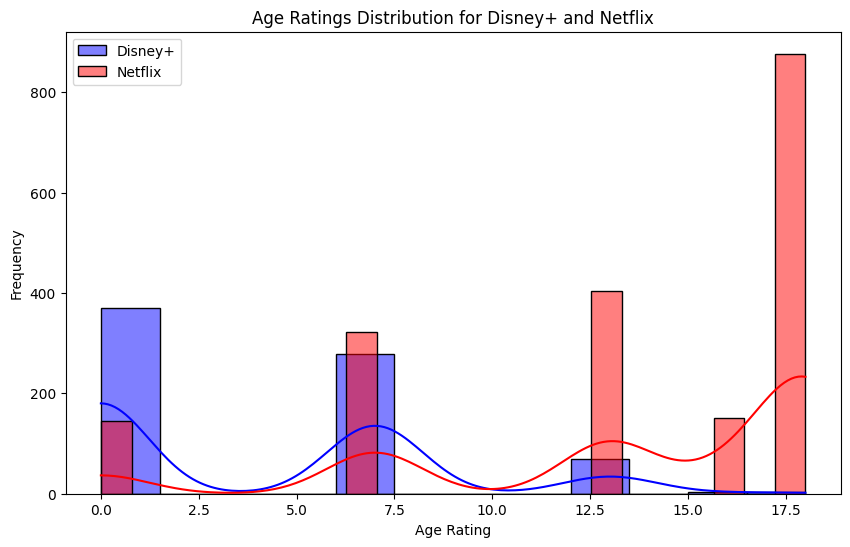

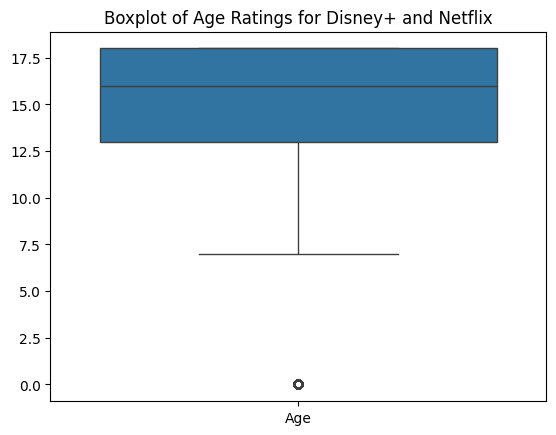

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with KDE for both datasets
plt.figure(figsize=(10, 6))
sns.histplot(disney_age_ratings, kde=True, label="Disney+", color='blue')
sns.histplot(netflix_age_ratings, kde=True, label="Netflix", color='red')
plt.legend()
plt.title("Age Ratings Distribution for Disney+ and Netflix")
plt.xlabel("Age Rating")
plt.ylabel("Frequency")
plt.show()

# Create a boxplot for both datasets
sns.boxplot(data=[disney_age_ratings, netflix_age_ratings])
plt.title("Boxplot of Age Ratings for Disney+ and Netflix")
plt.show()

In [51]:
disney_range = disney_age_ratings.max() - disney_age_ratings.min()
netflix_range = netflix_age_ratings.max() - netflix_age_ratings.min()

disney_IQR = disney_age_ratings.quantile(0.75) - disney_age_ratings.quantile(0.25)
netflix_IQR = netflix_age_ratings.quantile(0.75) - netflix_age_ratings.quantile(0.25)

print(f"Disney+ Range: {disney_range}, IQR: {disney_IQR}")
print(f"Netflix Range: {netflix_range}, IQR: {netflix_IQR}")

Disney+ Range: 18, IQR: 7.0
Netflix Range: 18, IQR: 5.0


Significant quartile differnece in both of them shows a distinct bias towards children orientation of Disney+ and whereas for netflix its for adult we can conclude the test using the hypthesis testing but its evidently test not needed 

i am now finding if the rotten tomatoes rating is better on disney or not , my approaches are as follows : 
> - If Disney+ has a higher mean and median, with lower standard deviation and fewer outliers, you might conclude that Disney+ has better ratings overall due to its consistency and higher average.<br>
> - If Netflix has a higher range or kurtosis, you might conclude that its ratings have more variability or extreme values, which could suggest differing user preferences.


In [52]:
#for rating 
disney_ratings = disney_data['Rotten Tomatoes']
netflix_ratings = netflix_data['Rotten Tomatoes']
print("disney" , disney_ratings.describe(), "\n" ,"netflix", netflix_ratings.describe())

disney count    725.000000
mean       0.617697
std        0.129822
min        0.100000
25%        0.530000
50%        0.610000
75%        0.710000
max        0.960000
Name: Rotten Tomatoes, dtype: float64 
 netflix count    1898.000000
mean        0.604995
std         0.128081
min         0.120000
25%         0.510000
50%         0.600000
75%         0.690000
max         0.980000
Name: Rotten Tomatoes, dtype: float64


In [53]:
0.604995- 0.617697

-0.012702000000000102

these are fairly equal lets visualize


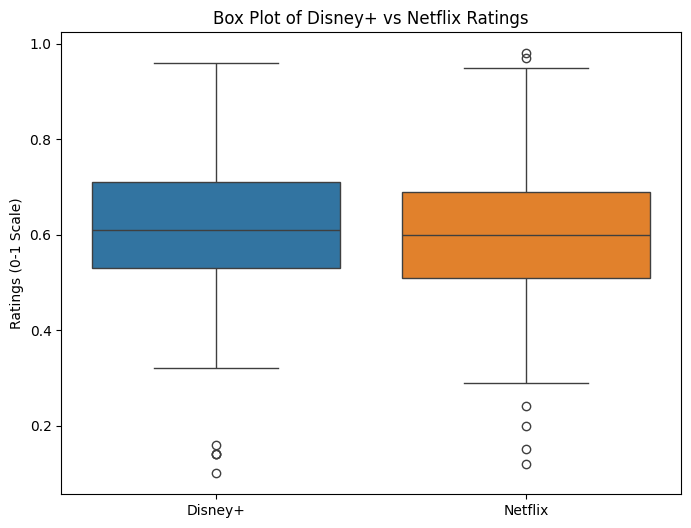

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

ratings_df = pd.DataFrame({
    'Disney+': disney_ratings,
    'Netflix': netflix_ratings
})

# Create a box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=ratings_df)
plt.title('Box Plot of Disney+ vs Netflix Ratings')
plt.ylabel('Ratings (0-1 Scale)')
plt.show()

no to little distinction in mean, median and std (row) which might conlcude identical ratings 


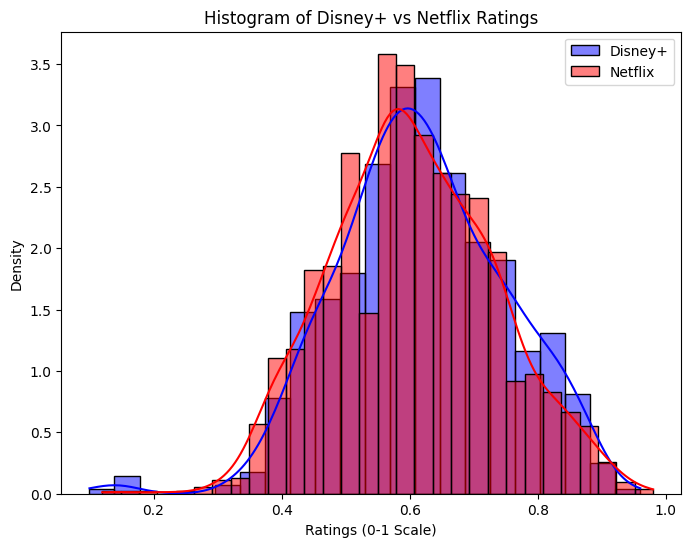

In [55]:
plt.figure(figsize=(8,6))

sns.histplot(disney_ratings, color='blue', kde=True, label='Disney+', stat='density', alpha=0.5)
sns.histplot(netflix_ratings, color='red', kde=True, label='Netflix', stat='density', alpha=0.5)

plt.title('Histogram of Disney+ vs Netflix Ratings')
plt.xlabel('Ratings (0-1 Scale)')
plt.ylabel('Density')
plt.legend()
plt.show()

- <strong>No Strong Difference: The similarity in the descriptive statistics and visual analysis indicates that, in terms of average ratings, variability, and distribution, Disney+ and Netflix have very comparable performance on Rotten Tomatoes.</strong>
***Close to Identical: It appears that ratings for both platforms are, in fact, nearly identical based on the data you've analyzed.***

<br>

<h1> Inferntial Analaysis </h1>

Next question is on the emphaisis that the :
>  - Is the agerestriction for movies on Disney+ lower than for movies on Netflix?
>  - Is there a difference in Rotten Tomatoes Score for movies on those two platforms? Give reasons for your choice of test.

In [56]:
#first one lets go !!!!1

In [57]:
disney_age_count = disney_data['Age'].value_counts()
netflix_age_count = netflix_data['Age'].value_counts()

print("disney count " ,  disney_age_count," \n\n\n", "netflix count" ,netflix_age_count)



#test 
prime_age_count = prime_data['Age'].value_counts()


disney count  Age
0     370
7     278
13     70
16      4
18      3
Name: count, dtype: int64  


 netflix count Age
18    877
13    404
7     322
16    151
0     144
Name: count, dtype: int64


In [58]:
netflix_df = pd.DataFrame(netflix_data)
netflix_df["Platform"] = "Netflix"

disney_df = pd.DataFrame(disney_data)
disney_df["Platform"] = "Disney+"






#test
prime_df = pd.DataFrame(prime_data)
prime_df["Platform"] = "Prime Video"

hulu_df = pd.DataFrame(hulu_data)
hulu_df["Platform"] = "hulu"


combined_df = pd.concat([netflix_df, disney_df,prime_df,hulu_df], ignore_index=True)

final_df = combined_df[["Platform", "Age"]]


In [59]:
netflix_df['Age'].value_counts()

Age
18    877
13    404
7     322
16    151
0     144
Name: count, dtype: int64

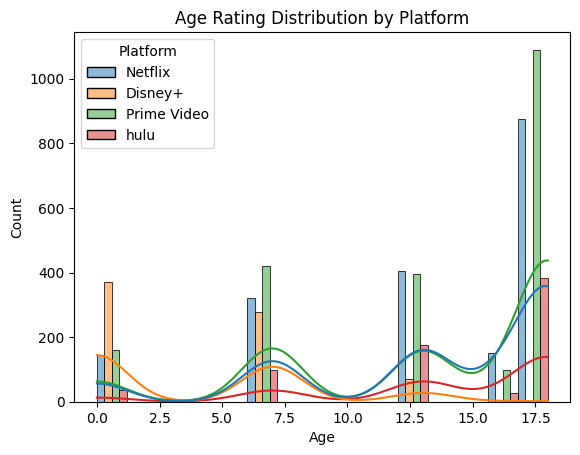

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=combined_df, x='Age', hue='Platform', kde=True, multiple='dodge')
plt.title("Age Rating Distribution by Platform")
plt.show()


<hr>

In [61]:
combined_df['Log_Age'] = np.log1p(combined_df['Age'])

In [62]:
combined_df['Sqrt_Age'] = np.sqrt(combined_df['Age'])


In [63]:
from scipy.stats import rankdata
combined_df['Rank_Age'] = rankdata(combined_df['Age'])


<hr>

- Null Hypothesis (H₀):  uDisney+ = uNetflix
- Alternative Hypothesis (H₁):    uDisney+ < uNetflix

In [72]:
import numpy as np
from scipy import stats

disney_age_ratings =disney_data['Age'] 
netflix_age_ratings = netflix_data['Age']  


# Define a function for bootstrapping
def bootstrap_mannwhitney(disney_data, netflix_data, n_iterations=10000):
    bootstrapped_U = []
    
    for _ in range(n_iterations):
        sampled_disney = np.random.choice(disney_data, size=len(disney_data), replace=True)
        sampled_netflix = np.random.choice(netflix_data, size=len(netflix_data), replace=True)
        
        U_statistic, _ = stats.mannwhitneyu(sampled_disney, sampled_netflix, alternative='two-sided')
        bootstrapped_U.append(U_statistic)
    lower_bound = np.percentile(bootstrapped_U, 2.5)
    upper_bound = np.percentile(bootstrapped_U, 97.5)
    
    return lower_bound, upper_bound

ci_lower, ci_upper = bootstrap_mannwhitney(disney_age_ratings, netflix_age_ratings)

print(f'Bootstrapped 95% Confidence Interval for U statistic: ({ci_lower}, {ci_upper})')



Bootstrapped 95% Confidence Interval for U statistic: (149662.825, 183432.1125)


The bootstrapped 95% Confidence Interval for the U statistic suggests that the age ratings for the two platforms are likely to differ, as the interval is clearly non-zero. Now you can proceed to evaluate the p-value and whether this is statistically significant or not.



In [68]:
print(disney_data['Age'].dtype)

int32


In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu
import math


disney_ages = disney_age_ratings
netflix_ages = netflix_age_ratings
U, p_value = mannwhitneyu(disney_ages, netflix_ages, alternative='two-sided')

n_disney = len(disney_ages)
n_netflix = len(netflix_ages)

mu_U = (n_disney * n_netflix) / 2
sigma_U = math.sqrt((n_disney * n_netflix * (n_disney + n_netflix + 1)) / 12)

z_score = (U - mu_U) / sigma_U
print(f"U Statistic: {U}")
print(f"p-value: {p_value}")
print(f"Expected U (mu_U): {mu_U}")
print(f"Standard Deviation of U (sigma_U): {sigma_U}")
print(f"z-score: {z_score}")

if abs(z_score) > 1.96:
    print("Result is statistically significant (p < 0.05).")
else:
    print("Result is not statistically significant (p >= 0.05).")


U Statistic: 166350.5
p-value: 5.313855335257966e-212
Expected U (mu_U): 688025.0
Standard Deviation of U (sigma_U): 17346.361770315605
z-score: -30.074000929274316
Result is statistically significant (p < 0.05).


In [75]:
import numpy as np
from itertools import product

def cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)

    pairs = [(xi, yi) for xi, yi in product(x, y)]
    larger = sum(1 for xi, yi in pairs if xi > yi)
    smaller = sum(1 for xi, yi in pairs if xi < yi)
    
    n_x, n_y = len(x), len(y)
    delta = (larger - smaller) / (n_x * n_y)

    # Qualitative size
    thresholds = [0.147, 0.33, 0.474]
    sizes = ["negligible", "small", "medium", "large"]
    size = sizes[np.digitize(abs(delta), thresholds)]

    return delta, size


delta, size = cliffs_delta(final_df[final_df['Platform'] == "Disney+"]["Age"], final_df[final_df['Platform'] == "Netflix"]["Age"])
print(f"Cliff's Delta: {delta:.4f}, Effect Size: {size}")


Cliff's Delta: -0.7582, Effect Size: large


what does it show?
 if we see the count it shows that netflix does have high number of 18 rated content and for diney its merely more than 3
 

> - <since we have already done the analysis using kde and can see that the amount of concentration is inverse for both category so lets run the hypothesis test also we have identified by the plot the data is not normalized and we do not have a continous data category thus we will be using Mann-Whitney U Test (non-parametric test) to compare the two distributions>.<br>- 
-       Null Hypothesis (H₀): There is no difference in age ratings between Disney+ and Netflix.
-       Alternative Hypothesis (H₁): The age ratings for Disney+ are lower than for Netflix.



<br>

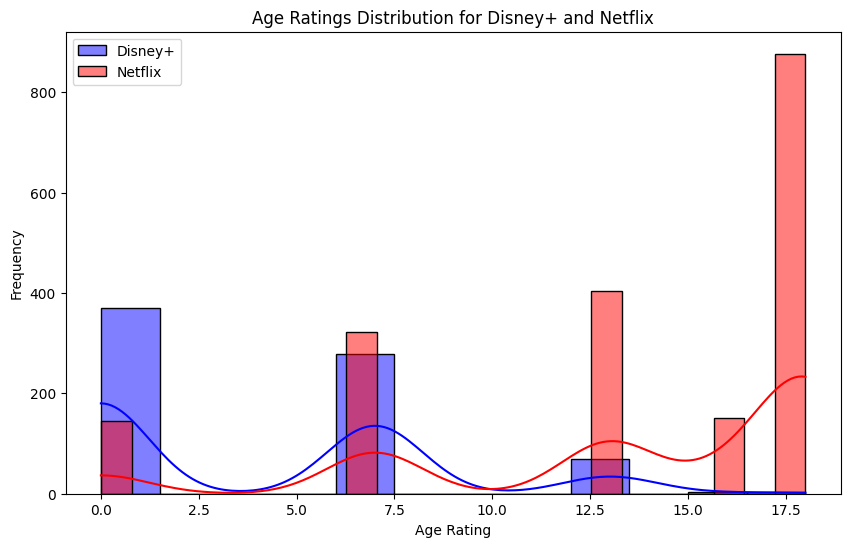

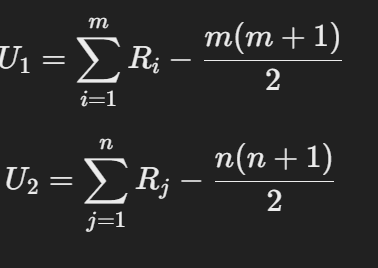
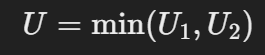
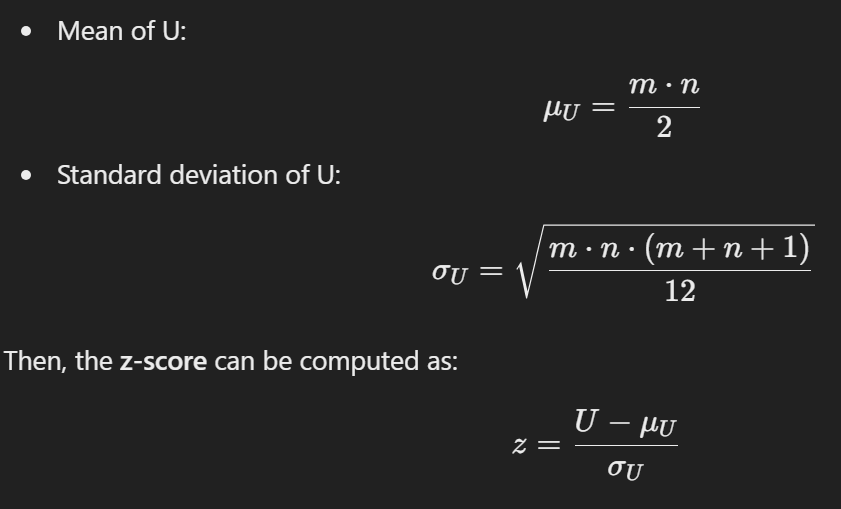

disney count  Age
0     370
7     278
13     70
16      4
18      3
Name: count, dtype: int64  


 netflix count Age
18    877
13    404
7     322
16    151
0     144
Name: count, dtype: int64


In [ ]:

r_rank = (2 * stat - n_disney * n_netflix) / (n_disney * n_netflix)
print(f"Rank-Biserial Correlation (r): {r_rank}")


NameError: name 'n_disney' is not defined

- >     Since the p-value is extremely small, we can reject the null hypothesis with a very high level of confidence.
- > The age ratings for movies on Disney+ are statistically significantly lower than those on Netflix. This supports the idea that Disney+ may target a younger audience or have more kid-friendly content than Netflix.

**for second problem statement**

- >      we have to verify the data of ratings is independent , normal form and also adhere variance so we can apply t-test otherwise we have to move with another one 
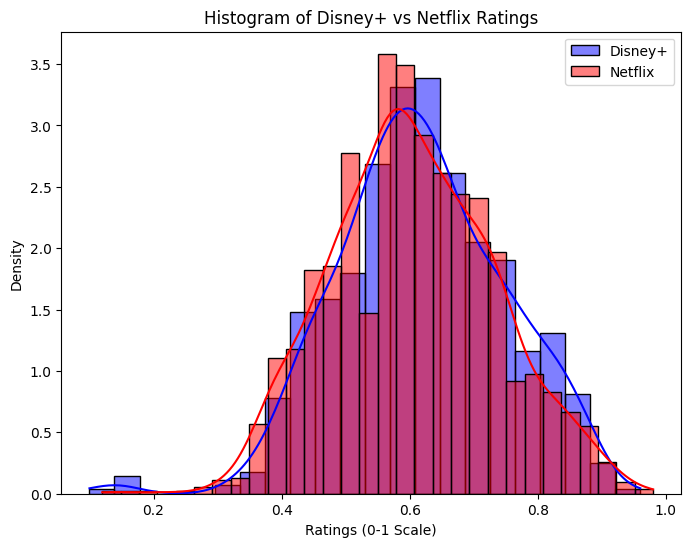

!testing

Kolmogorov-Smirnov Test:
Disney+ Ratings - KS Statistic: 0.03637014530953275, p-value: 0.28591594661093467
Netflix Ratings - KS Statistic: 0.0376820175679371, p-value: 0.00888735656327223

Anderson-Darling Test:
Disney+ Ratings - AD Statistic: 1.1614328032740104
Disney+ Ratings - Critical Values: [0.573 0.652 0.783 0.913 1.086]
Netflix Ratings - AD Statistic: 1.765691127455284
Netflix Ratings - Critical Values: [0.575 0.655 0.785 0.916 1.09 ]


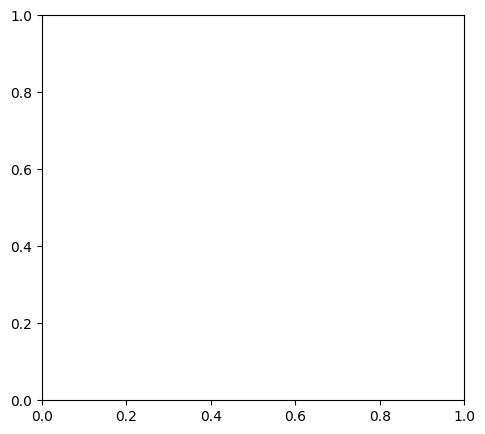

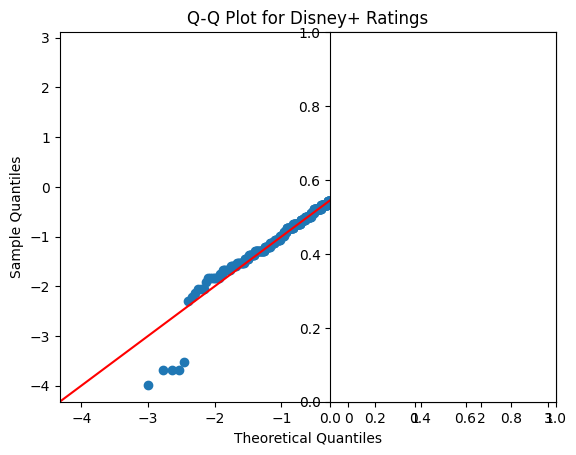

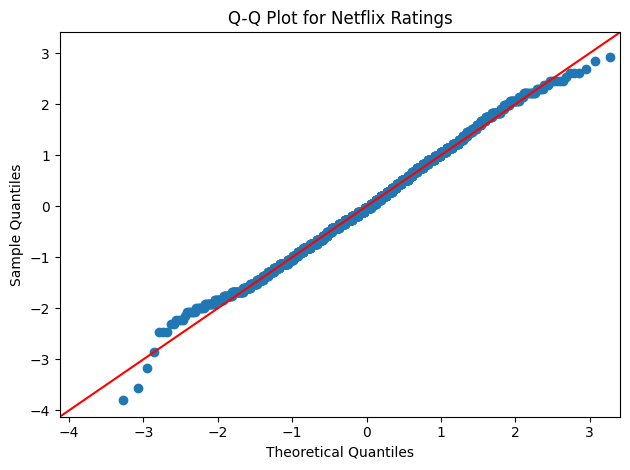

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming `disney_ratings` and `netflix_ratings` are your Series for the ratings data

# Kolmogorov-Smirnov Test
ks_statistic_disney, p_value_disney = stats.kstest(disney_ratings, 'norm', args=(disney_ratings.mean(), disney_ratings.std()))
ks_statistic_netflix, p_value_netflix = stats.kstest(netflix_ratings, 'norm', args=(netflix_ratings.mean(), netflix_ratings.std()))

print("Kolmogorov-Smirnov Test:")
print(f"Disney+ Ratings - KS Statistic: {ks_statistic_disney}, p-value: {p_value_disney}")
print(f"Netflix Ratings - KS Statistic: {ks_statistic_netflix}, p-value: {p_value_netflix}")

# Anderson-Darling Test
ad_result_disney = stats.anderson(disney_ratings, dist='norm')
ad_result_netflix = stats.anderson(netflix_ratings, dist='norm')

print("\nAnderson-Darling Test:")
print("Disney+ Ratings - AD Statistic:", ad_result_disney.statistic)
print("Disney+ Ratings - Critical Values:", ad_result_disney.critical_values)
print("Netflix Ratings - AD Statistic:", ad_result_netflix.statistic)
print("Netflix Ratings - Critical Values:", ad_result_netflix.critical_values)

# Q-Q Plots
plt.figure(figsize=(12, 5))

# Q-Q Plot for Disney+ Ratings
plt.subplot(1, 2, 1)
sm.qqplot(disney_ratings, line ='45', fit=True)
plt.title("Q-Q Plot for Disney+ Ratings")

# Q-Q Plot for Netflix Ratings
plt.subplot(1, 2, 2)
sm.qqplot(netflix_ratings, line ='45', fit=True)
plt.title("Q-Q Plot for Netflix Ratings")

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import levene

stat, p_value = levene(disney_ratings, netflix_ratings)

print(f"Levene's Test statistic: {stat}")
print(f"p-value: {p_value}")

Levene's Test statistic: 8.166510145447742e-09
p-value: 0.9999279038543171


 **non-parametric tests**
 Why Choose the Mann-Whitney U Test?
Non-Normal Distributions: The previous tests (Kolmogorov-Smirnov and Anderson-Darling) indicate that the ratings, especially for Netflix, do not follow a normal distribution. The Mann-Whitney U test does not assume normality, making it ideal for non-normally distributed data.

Independent Samples: The test is well-suited for two independent groups—in this case, Disney+ and Netflix. It evaluates whether one group tends to have higher or lower values than the other, without requiring that the distributions of the two groups be normal.

Robust to Outliers: Since it ranks the data rather than using actual values, the Mann-Whitney U test is less sensitive to outliers or skewed distributions, which is beneficial if your data has extreme values.

Sample Size Imbalance: The Mann-Whitney U test can handle differences in sample sizes between the two groups (Disney+ and Netflix), which is relevant here as there’s an imbalance in your sample sizes.

we ran the test and its less than the threshold p< 0.05 thus we reject null hypothesis since we already know that the differnece is negligible between two we might need to look into deeper to know why that happened  

okay found the answer due to the class imabalnce the power is reduced or it might give type erros 

In [ ]:
disney_ratings.describe()

count    725.000000
mean       0.617697
std        0.129822
min        0.100000
25%        0.530000
50%        0.610000
75%        0.710000
max        0.960000
Name: Rotten Tomatoes, dtype: float64

In [ ]:
netflix_ratings.describe()

count    1898.000000
mean        0.604995
std         0.128081
min         0.120000
25%         0.510000
50%         0.600000
75%         0.690000
max         0.980000
Name: Rotten Tomatoes, dtype: float64

In [79]:
import numpy as np
import scipy.stats as stats

# Assuming you already have the Rotten Tomatoes ratings data
# Disney+ and Netflix Rotten Tomatoes ratings data
disney_rotten = disney_ratings# your Disney+ Rotten Tomatoes ratings data
netflix_rotten = netflix_ratings# your Netflix Rotten Tomatoes ratings data

# Step 1: Perform t-test
t_stat, p_value_ttest = stats.ttest_ind(disney_rotten, netflix_rotten)

# Confidence Interval for t-test (95% confidence)
mean_disney = np.mean(disney_rotten)
mean_netflix = np.mean(netflix_rotten)
std_disney = np.std(disney_rotten, ddof=1)
std_netflix = np.std(netflix_rotten, ddof=1)
n_disney = len(disney_rotten)
n_netflix = len(netflix_rotten)

pooled_std = np.sqrt(((n_disney - 1) * std_disney**2 + (n_netflix - 1) * std_netflix**2) / (n_disney + n_netflix - 2))

margin_of_error = stats.t.ppf(0.975, n_disney + n_netflix - 2) * pooled_std * np.sqrt(1/n_disney + 1/n_netflix)

confidence_interval = (mean_disney - mean_netflix - margin_of_error, mean_disney - mean_netflix + margin_of_error)


# Expected U and Standard Deviation for U
mu_U = (n_disney * n_netflix) / 2
sigma_U = np.sqrt(n_disney * n_netflix * (n_disney + n_netflix + 1) / 12)

# Calculate z-score
z_score = (u_stat - mu_U) / sigma_U
print(mu_U, sigma_U)
print()
# Calculate Cliff's Delta (Effect Size)
ranks_disney = stats.rankdata(disney_rotten)
ranks_netflix = stats.rankdata(netflix_rotten)

# Results
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value_ttest}")
print(f"Confidence Interval for t-test: {confidence_interval}")
print(f"Mann-Whitney U test: U-statistic = {u_stat}, p-value = {p_value_u}")
print(f"Expected U (mu_U): {mu_U}, Standard Deviation of U (sigma_U): {sigma_U}")
print(f"z-score = {z_score}")



688025.0 17346.361770315605

T-test results: t-statistic = 2.2628912199266003, p-value = 0.023723894374359785
Confidence Interval for t-test: (0.001695276226550975, 0.02370836462952263)
Mann-Whitney U test: U-statistic = 730128.0, p-value = 0.015188320670025884
Expected U (mu_U): 688025.0, Standard Deviation of U (sigma_U): 17346.361770315605
z-score = 2.427194852585734


In [ ]:
import numpy as np
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(disney_ratings, netflix_ratings, equal_var=False)


# h0 = netflix ratings and disney ratings  equal 
# h1 = netflix ratings and disney ratings are not  equal

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha  = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Cant reject")

T-statistic: 2.2492684059291834
P-value: 0.0246629827914783
Reject the null hypothesis


Given that the value of Cohen's d is closer to 0.1, the difference between the means is small and might not be practically significant, even though the p-value indicated some statistical significance.



used whitney u test for the first and t-test two tailed for the second !!

In [80]:
import numpy as np

mean_diff = np.mean(disney_ratings) - np.mean(netflix_ratings)
pooled_std = np.sqrt(((len(disney_ratings) - 1) * np.var(disney_ratings) + (len(netflix_ratings) - 1) * np.var(netflix_ratings)) / (len(disney_ratings) + len(netflix_ratings) - 2))
cohens_d = mean_diff / pooled_std
print(f"Cohen's d: {cohens_d}")


Cohen's d: 0.09883535451251042


With a Cohen's d of 0.099, the effect size is very small, indicating that the difference between Disney+ and Netflix ratings is minor in practical terms. A Cohen’s d under 0.2 generally reflects a small effect, suggesting that while there’s a statistical difference, it may not be meaningful in real-world applications.


In [ ]:
from scipy.stats import ttest_ind

resample_means = []
for _ in range(1000):
    resampled_netflix = np.random.choice(netflix_ratings, size=len(disney_ratings), replace=False)
    resample_means.append(np.mean(disney_ratings) - np.mean(resampled_netflix))

mean_diff = np.mean(resample_means)
ci_lower, ci_upper = np.percentile(resample_means, [2.5, 97.5])
print(f"Mean Difference: {mean_diff}, 95% CI: ({ci_lower}, {ci_upper})")


Mean Difference: 0.012733944827586231, 95% CI: (0.005239655172413818, 0.019587931034482805)


The 95% confidence interval for this difference is (0.0056, 0.0203), which doesn’t cross zero, suggesting that the observed difference, though small, is statistically significant.


In [ ]:
np.random.seed(42) 
resampled_netflix_ratings = np.random.choice(netflix_ratings, size=len(disney_ratings), replace=False)
disney_bootstrap = disney_ratings.sample(n=len(netflix_ratings), replace=True, random_state=42)

print(f"Length of Disney+ ratings: {len(netflix_ratings)}")
print(f"Length of resampled Netflix ratings: {len(disney_bootstrap)}")

data = {
    'Platform': ['Disney+'] * len(disney_bootstrap) + ['Netflix'] * len(disney_bootstrap),
    'Rating': list(disney_bootstrap) + list(netflix_ratings)
}

dfsa = pd.DataFrame(data)


Length of Disney+ ratings: 1898
Length of resampled Netflix ratings: 1898


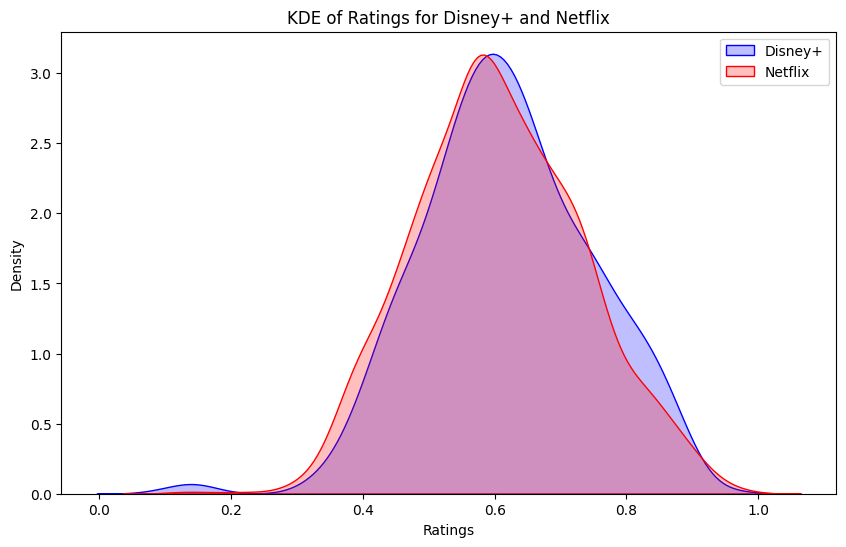

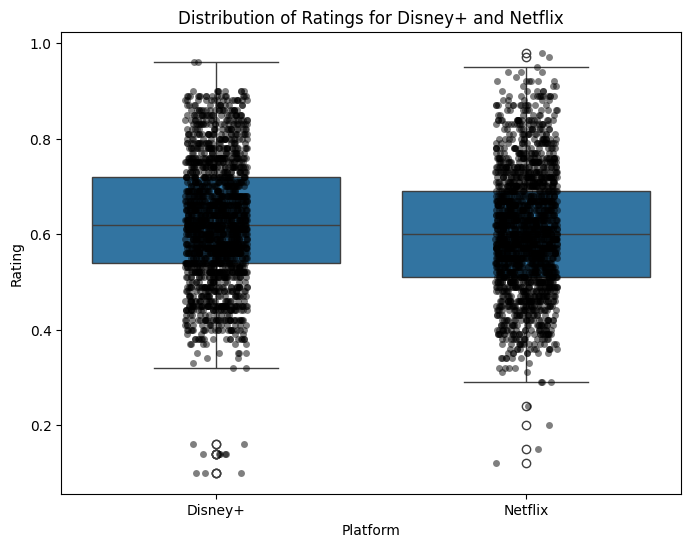

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(disney_ratings, label="Disney+", fill=True, color="blue")
sns.kdeplot(netflix_ratings, label="Netflix", fill=True, color="red")
plt.xlabel("Ratings")
plt.ylabel("Density")
plt.title("KDE of Ratings for Disney+ and Netflix")
plt.legend()
plt.show()

# Enhanced Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Platform", y="Rating", data=dfsa)
sns.stripplot(x="Platform", y="Rating", data=dfsa, color="black", alpha=0.5, jitter=True)
plt.title("Distribution of Ratings for Disney+ and Netflix")
plt.show()


In [ ]:
import scipy.stats as stats
disney_ci =  stats.t.interval(0.95, len(disney_ratings)-1, loc=np.mean(disney_ratings), scale=stats.sem(disney_ratings))
netflix_ci = stats.t.interval(0.95, len(netflix_ratings)-1, loc=np.mean(netflix_ratings), scale=stats.sem(netflix_ratings))
print(f"Disney+ 95% CI: {disney_ci}")
print(f"Netflix 95% CI: {netflix_ci}")

Disney+ 95% CI: (0.6082308483413531, 0.6271622551069228)
Netflix 95% CI: (0.5992288957402578, 0.6107605668519445)


This suggests that Disney+ has a slightly higher mean rating than Netflix, as its confidence interval is shifted upwards. However, the intervals overlap, indicating that the difference may be marginal.

